In [215]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [216]:
pd.options.display.max_rows = 4000

In [217]:
df = pd.read_csv("./../Desktop/datasets/train.csv")

In [218]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [219]:
df.shape

(1460, 81)

In [220]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [222]:
for column in df.columns:
    print(column, df[column].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [223]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [224]:
df.drop(["Alley"], axis = 1, inplace = True)

In [225]:
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [226]:
df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

In [227]:
df.drop(["GarageYrBlt"], axis = 1, inplace = True)

In [228]:
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageQual"].mode()[0])

In [229]:
df.drop(["PoolQC", "Fence", "MiscFeature"], axis = 1, inplace= True)

In [230]:
df.shape

(1460, 76)

In [231]:
df.drop(["Id"], axis = 1, inplace = True)

In [232]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [233]:
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

<AxesSubplot: >

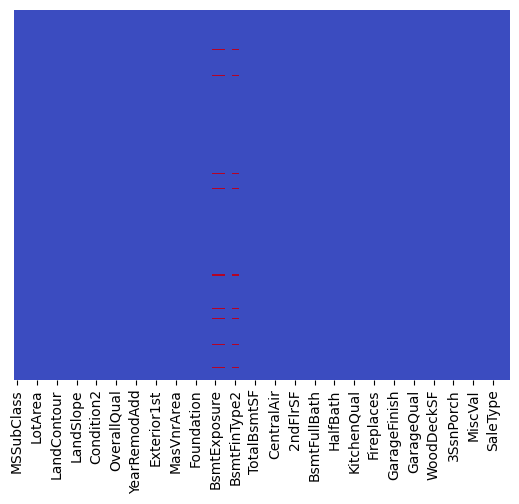

In [234]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "coolwarm")

In [235]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

In [236]:
df.dropna(inplace = True)

In [237]:
df.shape

(1421, 75)

In [238]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [239]:
# handle categorical features 

In [240]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]

In [241]:
main_data = df.copy()

In [242]:
# handling missing values on the test dataset

df_test = pd.read_csv("./../Desktop/datasets/test.csv")

In [243]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [244]:
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean())
df_test.drop(["Alley"], axis = 1, inplace = True)
df_test["BsmtCond"] = df_test["BsmtCond"].fillna(df_test["BsmtCond"].mode()[0])
df_test["BsmtQual"] = df_test["BsmtQual"].fillna(df_test["BsmtQual"].mode()[0])
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna(df_test["FireplaceQu"].mode()[0])
df_test["GarageType"] = df_test["GarageType"].fillna(df_test["GarageType"].mode()[0])
df_test.drop(["GarageYrBlt"], axis = 1, inplace = True)
df_test["GarageFinish"] = df_test["GarageFinish"].fillna(df_test["GarageFinish"].mode()[0])
df_test["GarageQual"] = df_test["GarageQual"].fillna(df_test["GarageQual"].mode()[0])
df_test["GarageCond"] = df_test["GarageCond"].fillna(df_test["GarageQual"].mode()[0])
df_test.drop(["PoolQC", "Fence", "MiscFeature"], axis = 1, inplace= True)
df_test.drop(["Id"], axis = 1, inplace = True)
df_test["MasVnrType"] = df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0])
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mode()[0])
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])
df_test.dropna(inplace = True)

In [245]:
df_test.shape

(1408, 74)

In [246]:
def category_one_hot(multicolumns, dataset):
    
    final_data = pd.DataFrame()
    for col in multicolumns:
        data1 = pd.get_dummies(dataset[col], drop_first = True)
        dataset.drop([col], axis = 1, inplace = True)
        final_data = pd.concat([final_data, data1], axis = 1)
    return pd.concat([final_data, dataset], axis = 1)

In [247]:
df = pd.concat([df, df_test], axis = 0)

In [248]:
df.shape

(2829, 75)

In [249]:
df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780.0
59      124900.0
60      158000

In [250]:
final = category_one_hot(categorical_columns, df)

In [251]:
final = final.loc[:, ~final.columns.duplicated()]

In [252]:
final

FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  ...  WoodDeckSF  \
0      0   0   1   0     1    0    0    1    0    0  ...           0   
1      0   0   1   0     1    0    0    1    0    0  ...         298   
2      0   0   1   0     1    0    0    0    0    0  ...           0   
3      0   0   1   0     1    0    0    0    0    0  ...           0   
4      0   0   1   0     1    0    0    0    0    0  ...         192   
5      0   0   1   0     1    0    0    0    0    0  ...          40   
6      0   0   1   0     1    0    0    1    0    0  ...         255   
7      0   0   1   0     1    0    0    0    0    0  ...         235   
8      0   0   0   1     1    0    0    1    0    0  ...          90   
9      0   0   1   0     1    0    0    1    0    0  ...           0   
10     0   0   1   0     1    0    0    1    0    0  ...           0   
11     0   0   1   0     1    0    0    0    0    0  ...         147   
12     0   0   1   0     1    1    0    0    0    0  ...         140   
13     0   0   1   0     1    0    0    0    0    0  ...         160   
14     0   0   1   0     1    0    0    0    0    0  ...           0   
15     0   0   0   1     1    0    0    1    0    0  ...          48   
16     0   0   1   0     1    0    0    0    0    0  ...           0   
18     0   0   1   0     1    0    0    1    0    0  ...           0   
19     0   0   1   0     1    0    0    1    0    0  ...           0   
20     0   0   1   0     1    0    0    0    0    0  ...         240   
21     0   0   0   1     1    0    0    1    0    0  ...           0   
22     0   0   1   0     1    0    0    1    0    0  ...         171   
23     0   0   0   1     1    0    0    1    0    0  ...         100   
24     0   0   1   0     1    0    0    0    0    0  ...         406   
25     0   0   1   0     1    0    0    1    0    0  ...           0   
26     0   0   1   0     1    0    0    1    0    0  ...         222   
27     0   0   1   0     1    0    0    1    0    0  ...           0   
28     0   0   1   0     1    0    0    0    0    0  ...         288   
29     0   0   0   1     1    0    0    0    0    0  ...          49   
30     0   0   0   0     1    0    0    1    0    0  ...           0   
31     0   0   1   0     1    0    0    0    0    0  ...           0   
32     0   0   1   0     1    0    0    1    0    0  ...           0   
33     0   0   1   0     1    0    0    0    0    0  ...           0   
34     0   0   1   0     1    0    0    1    0    0  ...         203   
35     0   0   1   0     1    0    0    1    0    0  ...         113   
36     0   0   1   0     1    0    0    1    0    0  ...         392   
37     0   0   1   0     1    0    0    1    0    0  ...           0   
38     0   0   1   0     1    0    0    1    0    0  ...           0   
40     0   0   1   0     1    0    0    1    0    0  ...           0   
41     0   0   1   0     1    0    0    1    0    0  ...           0   
42     0   0   1   0     1    0    0    0    0    0  ...         240   
43     0   0   1   0     1    0    0    0    0    0  ...         145   
44     0   0   1   0     1    0    0    1    0    0  ...           0   
45     0   0   1   0     1    0    0    1    0    0  ...         196   
46     0   0   1   0     1    0    0    0    0    0  ...         168   
47     1   0   0   0     1    0    0    1    0    0  ...           0   
48     0   0   0   1     1    0    0    1    0    0  ...           0   
49     0   0   1   0     1    0    0    1    0    0  ...           0   
50     0   0   1   0     1    1    0    0    0    0  ...           0   
51     0   0   0   1     1    0    0    1    0    0  ...         112   
52     0   0   0   1     0    1    0    0    0    0  ...         106   
53     0   0   1   0     1    0    0    0    0    1  ...         857   
54     0   0   1   0     1    0    0    1    0    0  ...           0   
55     0   0   1   0     1    0    0    0    0    0  ...           0   
56     1   0   0   0     1    0    0    1    0

In [253]:
final.shape

(2829, 173)

In [254]:
train_df = final.iloc[:1421, :]

In [255]:
train_df

FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  ...  WoodDeckSF  \
0      0   0   1   0     1    0    0    1    0    0  ...           0   
1      0   0   1   0     1    0    0    1    0    0  ...         298   
2      0   0   1   0     1    0    0    0    0    0  ...           0   
3      0   0   1   0     1    0    0    0    0    0  ...           0   
4      0   0   1   0     1    0    0    0    0    0  ...         192   
5      0   0   1   0     1    0    0    0    0    0  ...          40   
6      0   0   1   0     1    0    0    1    0    0  ...         255   
7      0   0   1   0     1    0    0    0    0    0  ...         235   
8      0   0   0   1     1    0    0    1    0    0  ...          90   
9      0   0   1   0     1    0    0    1    0    0  ...           0   
10     0   0   1   0     1    0    0    1    0    0  ...           0   
11     0   0   1   0     1    0    0    0    0    0  ...         147   
12     0   0   1   0     1    1    0    0    0    0  ...         140   
13     0   0   1   0     1    0    0    0    0    0  ...         160   
14     0   0   1   0     1    0    0    0    0    0  ...           0   
15     0   0   0   1     1    0    0    1    0    0  ...          48   
16     0   0   1   0     1    0    0    0    0    0  ...           0   
18     0   0   1   0     1    0    0    1    0    0  ...           0   
19     0   0   1   0     1    0    0    1    0    0  ...           0   
20     0   0   1   0     1    0    0    0    0    0  ...         240   
21     0   0   0   1     1    0    0    1    0    0  ...           0   
22     0   0   1   0     1    0    0    1    0    0  ...         171   
23     0   0   0   1     1    0    0    1    0    0  ...         100   
24     0   0   1   0     1    0    0    0    0    0  ...         406   
25     0   0   1   0     1    0    0    1    0    0  ...           0   
26     0   0   1   0     1    0    0    1    0    0  ...         222   
27     0   0   1   0     1    0    0    1    0    0  ...           0   
28     0   0   1   0     1    0    0    0    0    0  ...         288   
29     0   0   0   1     1    0    0    0    0    0  ...          49   
30     0   0   0   0     1    0    0    1    0    0  ...           0   
31     0   0   1   0     1    0    0    0    0    0  ...           0   
32     0   0   1   0     1    0    0    1    0    0  ...           0   
33     0   0   1   0     1    0    0    0    0    0  ...           0   
34     0   0   1   0     1    0    0    1    0    0  ...         203   
35     0   0   1   0     1    0    0    1    0    0  ...         113   
36     0   0   1   0     1    0    0    1    0    0  ...         392   
37     0   0   1   0     1    0    0    1    0    0  ...           0   
38     0   0   1   0     1    0    0    1    0    0  ...           0   
40     0   0   1   0     1    0    0    1    0    0  ...           0   
41     0   0   1   0     1    0    0    1    0    0  ...           0   
42     0   0   1   0     1    0    0    0    0    0  ...         240   
43     0   0   1   0     1    0    0    0    0    0  ...         145   
44     0   0   1   0     1    0    0    1    0    0  ...           0   
45     0   0   1   0     1    0    0    1    0    0  ...         196   
46     0   0   1   0     1    0    0    0    0    0  ...         168   
47     1   0   0   0     1    0    0    1    0    0  ...           0   
48     0   0   0   1     1    0    0    1    0    0  ...           0   
49     0   0   1   0     1    0    0    1    0    0  ...           0   
50     0   0   1   0     1    1    0    0    0    0  ...           0   
51     0   0   0   1     1    0    0    1    0    0  ...         112   
52     0   0   0   1     0    1    0    0    0    0  ...         106   
53     0   0   1   0     1    0    0    0    0    1  ...         857   
54     0   0   1   0     1    0    0    1    0    0  ...           0   
55     0   0   1   0     1    0    0    0    0    0  ...           0   
56     1   0   0   0     1    0    0    1    0

In [256]:
test_df = final.iloc[1421:, :]

In [257]:
test_df = test_df.drop(["SalePrice"], axis = 1)

In [258]:
X_train = train_df.drop(["SalePrice"], axis = 1)
y_train = train_df["SalePrice"]

In [259]:
import xgboost 
Classifier = xgboost.XGBRegressor()
Classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

(1408, 172)

In [210]:
y_pred

array([125637.76, 150808.34, 206753.  , ..., 169272.89,  98566.57,
       238469.52], dtype=float32)

In [211]:
y_pred.shape

(1408,)

In [212]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("./../Desktop/datasets/Housing_prices_advanced_techniques/sample_submission.csv")

In [214]:
datasets = pd.concat([sub_df["Id"], pred], axis = 1)
datasets.columns = ["Id", "SalePrice"]
datasets.to_csv("sample_submission.csv", index = False)

In [203]:
test_df = final.iloc[1421:, :]
test_df = test_df.drop(["SalePrice"], axis = 1)

In [189]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, input_dim = 172, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss= tf.keras.losses.MeanSquaredError() , optimizer='adam')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 0s 3ms/step - loss: 27629273088.0000 - val_loss: 6841593856.0000
Epoch 2/1000
114/114 [==============================] - 0s 741us/step - loss: 8008615424.0000 - val_loss: 5472890880.0000
Epoch 3/1000
114/114 [==============================] - 0s 714us/step - loss: 5357813760.0000 - val_loss: 4693043200.0000
Epoch 4/1000
114/114 [==============================] - 0s 750us/step - loss: 4071135488.0000 - val_loss: 4285449728.0000
Epoch 5/1000
114/114 [==============================] - 0s 706us/step - loss: 3340744704.0000 - val_loss: 3891338752.0000
Epoch 6/1000
114/114 [==============================] - 0s 706us/step - loss: 2764585472.0000 - val_loss: 3578561024.0000
Epoch 7/1000
114/114 [==============================] - 0s 697us/step - loss: 2429414400.0000 - val_loss: 3617041408.0000
Epoch 8/1000
114/114 [==============================] - 0s 794us/step - loss: 2208016640.0000 - val_loss: 3411402496.0000
Epoch 9/1000
114/114 [===

114/114 [==============================] - 0s 732us/step - loss: 1479780096.0000 - val_loss: 3743330304.0000
Epoch 68/1000
114/114 [==============================] - 0s 740us/step - loss: 1479156608.0000 - val_loss: 4122457344.0000
Epoch 69/1000
114/114 [==============================] - 0s 758us/step - loss: 1532306688.0000 - val_loss: 3895866368.0000
Epoch 70/1000
114/114 [==============================] - 0s 794us/step - loss: 1468233984.0000 - val_loss: 4332249088.0000
Epoch 71/1000
114/114 [==============================] - 0s 803us/step - loss: 1518909952.0000 - val_loss: 3729830656.0000
Epoch 72/1000
114/114 [==============================] - 0s 779us/step - loss: 1473165312.0000 - val_loss: 4111425536.0000
Epoch 73/1000
114/114 [==============================] - 0s 785us/step - loss: 1493246720.0000 - val_loss: 3721314048.0000
Epoch 74/1000
114/114 [==============================] - 0s 785us/step - loss: 1455734912.0000 - val_loss: 3801558528.0000
Epoch 75/1000
114/114 [=======

114/114 [==============================] - 0s 731us/step - loss: 1337602816.0000 - val_loss: 3438973184.0000
Epoch 134/1000
114/114 [==============================] - 0s 706us/step - loss: 1318524928.0000 - val_loss: 3447246592.0000
Epoch 135/1000
114/114 [==============================] - 0s 704us/step - loss: 1328311424.0000 - val_loss: 3370434560.0000
Epoch 136/1000
114/114 [==============================] - 0s 750us/step - loss: 1354138240.0000 - val_loss: 3917966080.0000
Epoch 137/1000
114/114 [==============================] - 0s 750us/step - loss: 1292395008.0000 - val_loss: 4066604032.0000
Epoch 138/1000
114/114 [==============================] - 0s 755us/step - loss: 1292136704.0000 - val_loss: 3438991104.0000
Epoch 139/1000
114/114 [==============================] - 0s 776us/step - loss: 1259545472.0000 - val_loss: 3765032960.0000
Epoch 140/1000
114/114 [==============================] - 0s 741us/step - loss: 1278488448.0000 - val_loss: 3331624448.0000
Epoch 141/1000
114/114 

114/114 [==============================] - 0s 816us/step - loss: 1156081024.0000 - val_loss: 3062092544.0000
Epoch 200/1000
114/114 [==============================] - 0s 781us/step - loss: 1103834752.0000 - val_loss: 3286272256.0000
Epoch 201/1000
114/114 [==============================] - 0s 790us/step - loss: 1129364480.0000 - val_loss: 2978845952.0000
Epoch 202/1000
114/114 [==============================] - 0s 753us/step - loss: 1111100800.0000 - val_loss: 3090298624.0000
Epoch 203/1000
114/114 [==============================] - 0s 764us/step - loss: 1110621184.0000 - val_loss: 3108612352.0000
Epoch 204/1000
114/114 [==============================] - 0s 728us/step - loss: 1095666560.0000 - val_loss: 3170241024.0000
Epoch 205/1000
114/114 [==============================] - 0s 711us/step - loss: 1082752384.0000 - val_loss: 2952155392.0000
Epoch 206/1000
114/114 [==============================] - 0s 697us/step - loss: 1077383808.0000 - val_loss: 2967215104.0000
Epoch 207/1000
114/114 

114/114 [==============================] - 0s 714us/step - loss: 897061952.0000 - val_loss: 2495439872.0000
Epoch 266/1000
114/114 [==============================] - 0s 714us/step - loss: 848971968.0000 - val_loss: 2341105152.0000
Epoch 267/1000
114/114 [==============================] - 0s 721us/step - loss: 879333312.0000 - val_loss: 2474577664.0000
Epoch 268/1000
114/114 [==============================] - 0s 730us/step - loss: 855512896.0000 - val_loss: 2395006976.0000
Epoch 269/1000
114/114 [==============================] - 0s 743us/step - loss: 1035797376.0000 - val_loss: 2501702144.0000
Epoch 270/1000
114/114 [==============================] - 0s 741us/step - loss: 865589440.0000 - val_loss: 2461273088.0000
Epoch 271/1000
114/114 [==============================] - 0s 763us/step - loss: 968509568.0000 - val_loss: 2614913280.0000
Epoch 272/1000
114/114 [==============================] - 0s 741us/step - loss: 845461952.0000 - val_loss: 2414530816.0000
Epoch 273/1000
114/114 [======

Epoch 332/1000
114/114 [==============================] - 0s 714us/step - loss: 665027712.0000 - val_loss: 1712700288.0000
Epoch 333/1000
114/114 [==============================] - 0s 714us/step - loss: 656199296.0000 - val_loss: 1890214912.0000
Epoch 334/1000
114/114 [==============================] - 0s 710us/step - loss: 629345536.0000 - val_loss: 1701096704.0000
Epoch 335/1000
114/114 [==============================] - 0s 694us/step - loss: 667459264.0000 - val_loss: 1847622528.0000
Epoch 336/1000
114/114 [==============================] - 0s 702us/step - loss: 681977152.0000 - val_loss: 1951972224.0000
Epoch 337/1000
114/114 [==============================] - 0s 730us/step - loss: 634649536.0000 - val_loss: 1789151360.0000
Epoch 338/1000
114/114 [==============================] - 0s 706us/step - loss: 635710720.0000 - val_loss: 1740024320.0000
Epoch 339/1000
114/114 [==============================] - 0s 706us/step - loss: 664440512.0000 - val_loss: 1814807680.0000
Epoch 340/1000
1

114/114 [==============================] - 0s 707us/step - loss: 574755904.0000 - val_loss: 1504761600.0000
Epoch 399/1000
114/114 [==============================] - 0s 697us/step - loss: 529389600.0000 - val_loss: 1508537344.0000
Epoch 400/1000
114/114 [==============================] - 0s 703us/step - loss: 595353408.0000 - val_loss: 1841654912.0000
Epoch 401/1000
114/114 [==============================] - 0s 706us/step - loss: 573851904.0000 - val_loss: 1614781184.0000
Epoch 402/1000
114/114 [==============================] - 0s 706us/step - loss: 538566592.0000 - val_loss: 1506956416.0000
Epoch 403/1000
114/114 [==============================] - 0s 697us/step - loss: 538648256.0000 - val_loss: 1533348992.0000
Epoch 404/1000
114/114 [==============================] - 0s 732us/step - loss: 582520704.0000 - val_loss: 1508242304.0000
Epoch 405/1000
114/114 [==============================] - 0s 723us/step - loss: 579628224.0000 - val_loss: 1520218624.0000
Epoch 406/1000
114/114 [=======

Epoch 465/1000
114/114 [==============================] - 0s 741us/step - loss: 494593152.0000 - val_loss: 1402435584.0000
Epoch 466/1000
114/114 [==============================] - 0s 773us/step - loss: 496727744.0000 - val_loss: 1418126592.0000
Epoch 467/1000
114/114 [==============================] - 0s 817us/step - loss: 506290464.0000 - val_loss: 1374970112.0000
Epoch 468/1000
114/114 [==============================] - 0s 781us/step - loss: 471686272.0000 - val_loss: 1374288384.0000
Epoch 469/1000
114/114 [==============================] - 0s 697us/step - loss: 518944288.0000 - val_loss: 1386442880.0000
Epoch 470/1000
114/114 [==============================] - 0s 706us/step - loss: 516738560.0000 - val_loss: 1465668480.0000
Epoch 471/1000
114/114 [==============================] - 0s 707us/step - loss: 569828864.0000 - val_loss: 1388324224.0000
Epoch 472/1000
114/114 [==============================] - 0s 706us/step - loss: 486463232.0000 - val_loss: 1418829312.0000
Epoch 473/1000
1

114/114 [==============================] - 0s 714us/step - loss: 442726560.0000 - val_loss: 1425209472.0000
Epoch 532/1000
114/114 [==============================] - 0s 703us/step - loss: 461119296.0000 - val_loss: 1382596224.0000
Epoch 533/1000
114/114 [==============================] - 0s 697us/step - loss: 458556896.0000 - val_loss: 1421328640.0000
Epoch 534/1000
114/114 [==============================] - 0s 697us/step - loss: 481554464.0000 - val_loss: 1403980288.0000
Epoch 535/1000
114/114 [==============================] - 0s 712us/step - loss: 438081056.0000 - val_loss: 1256884096.0000
Epoch 536/1000
114/114 [==============================] - 0s 695us/step - loss: 485506144.0000 - val_loss: 1357204224.0000
Epoch 537/1000
114/114 [==============================] - 0s 825us/step - loss: 558939264.0000 - val_loss: 1265835136.0000
Epoch 538/1000
114/114 [==============================] - 0s 723us/step - loss: 437125088.0000 - val_loss: 1305989760.0000
Epoch 539/1000
114/114 [=======

Epoch 598/1000
114/114 [==============================] - 0s 699us/step - loss: 375320960.0000 - val_loss: 1366007424.0000
Epoch 599/1000
114/114 [==============================] - 0s 718us/step - loss: 407784704.0000 - val_loss: 1171333632.0000
Epoch 600/1000
114/114 [==============================] - 0s 719us/step - loss: 409903008.0000 - val_loss: 1272747008.0000
Epoch 601/1000
114/114 [==============================] - 0s 714us/step - loss: 450077824.0000 - val_loss: 1243032960.0000
Epoch 602/1000
114/114 [==============================] - 0s 697us/step - loss: 400024416.0000 - val_loss: 1181102080.0000
Epoch 603/1000
114/114 [==============================] - 0s 714us/step - loss: 376671424.0000 - val_loss: 1175692032.0000
Epoch 604/1000
114/114 [==============================] - 0s 732us/step - loss: 392417056.0000 - val_loss: 1190979072.0000
Epoch 605/1000
114/114 [==============================] - 0s 697us/step - loss: 370046496.0000 - val_loss: 1208073600.0000
Epoch 606/1000
1

114/114 [==============================] - 0s 747us/step - loss: 355973856.0000 - val_loss: 1146763392.0000
Epoch 665/1000
114/114 [==============================] - 0s 702us/step - loss: 342991776.0000 - val_loss: 1230254336.0000
Epoch 666/1000
114/114 [==============================] - 0s 697us/step - loss: 346242560.0000 - val_loss: 1054426432.0000
Epoch 667/1000
114/114 [==============================] - 0s 706us/step - loss: 335406048.0000 - val_loss: 1131781760.0000
Epoch 668/1000
114/114 [==============================] - 0s 706us/step - loss: 338113536.0000 - val_loss: 1215754368.0000
Epoch 669/1000
114/114 [==============================] - 0s 723us/step - loss: 320061536.0000 - val_loss: 1097641728.0000
Epoch 670/1000
114/114 [==============================] - 0s 723us/step - loss: 331328320.0000 - val_loss: 1110158208.0000
Epoch 671/1000
114/114 [==============================] - 0s 732us/step - loss: 327400384.0000 - val_loss: 1334986880.0000
Epoch 672/1000
114/114 [=======

Epoch 731/1000
114/114 [==============================] - 0s 714us/step - loss: 298762464.0000 - val_loss: 1112759552.0000
Epoch 732/1000
114/114 [==============================] - 0s 741us/step - loss: 307118592.0000 - val_loss: 1302541440.0000
Epoch 733/1000
114/114 [==============================] - 0s 748us/step - loss: 658579456.0000 - val_loss: 1148345216.0000
Epoch 734/1000
114/114 [==============================] - 0s 688us/step - loss: 401091360.0000 - val_loss: 989652032.0000
Epoch 735/1000
114/114 [==============================] - 0s 723us/step - loss: 308760384.0000 - val_loss: 1115125120.0000
Epoch 736/1000
114/114 [==============================] - 0s 750us/step - loss: 305711520.0000 - val_loss: 1063191104.0000
Epoch 737/1000
114/114 [==============================] - 0s 723us/step - loss: 287989824.0000 - val_loss: 1017147136.0000
Epoch 738/1000
114/114 [==============================] - 0s 706us/step - loss: 307833920.0000 - val_loss: 1028289728.0000
Epoch 739/1000
11

114/114 [==============================] - 0s 738us/step - loss: 305632576.0000 - val_loss: 1148299136.0000
Epoch 798/1000
114/114 [==============================] - 0s 706us/step - loss: 276519776.0000 - val_loss: 1185634304.0000
Epoch 799/1000
114/114 [==============================] - 0s 757us/step - loss: 270693696.0000 - val_loss: 1202226560.0000
Epoch 800/1000
114/114 [==============================] - 0s 712us/step - loss: 319575840.0000 - val_loss: 1218024448.0000
Epoch 801/1000
114/114 [==============================] - 0s 729us/step - loss: 305648352.0000 - val_loss: 1063655744.0000
Epoch 802/1000
114/114 [==============================] - 0s 723us/step - loss: 298126688.0000 - val_loss: 1148447232.0000
Epoch 803/1000
114/114 [==============================] - 0s 741us/step - loss: 300410240.0000 - val_loss: 1043143296.0000
Epoch 804/1000
114/114 [==============================] - 0s 732us/step - loss: 296430080.0000 - val_loss: 1128037888.0000
Epoch 805/1000
114/114 [=======

Epoch 864/1000
114/114 [==============================] - 0s 711us/step - loss: 316567712.0000 - val_loss: 1362980736.0000
Epoch 865/1000
114/114 [==============================] - 0s 741us/step - loss: 259231680.0000 - val_loss: 1174482304.0000
Epoch 866/1000
114/114 [==============================] - 0s 706us/step - loss: 261395792.0000 - val_loss: 1100989312.0000
Epoch 867/1000
114/114 [==============================] - 0s 706us/step - loss: 300192832.0000 - val_loss: 1111293696.0000
Epoch 868/1000
114/114 [==============================] - 0s 714us/step - loss: 259538448.0000 - val_loss: 1367884928.0000
Epoch 869/1000
114/114 [==============================] - 0s 714us/step - loss: 274132672.0000 - val_loss: 1224815872.0000
Epoch 870/1000
114/114 [==============================] - 0s 714us/step - loss: 273895872.0000 - val_loss: 1080145280.0000
Epoch 871/1000
114/114 [==============================] - 0s 741us/step - loss: 312638944.0000 - val_loss: 1137884032.0000
Epoch 872/1000
1

114/114 [==============================] - 0s 702us/step - loss: 240065360.0000 - val_loss: 1185233792.0000
Epoch 931/1000
114/114 [==============================] - 0s 710us/step - loss: 237203504.0000 - val_loss: 1160495360.0000
Epoch 932/1000
114/114 [==============================] - 0s 750us/step - loss: 245534544.0000 - val_loss: 1137688192.0000
Epoch 933/1000
114/114 [==============================] - 0s 776us/step - loss: 243459840.0000 - val_loss: 1173222656.0000
Epoch 934/1000
114/114 [==============================] - 0s 785us/step - loss: 241707392.0000 - val_loss: 1212590464.0000
Epoch 935/1000
114/114 [==============================] - 0s 720us/step - loss: 259520224.0000 - val_loss: 1170674560.0000
Epoch 936/1000
114/114 [==============================] - 0s 706us/step - loss: 239796576.0000 - val_loss: 1154911104.0000
Epoch 937/1000
114/114 [==============================] - 0s 723us/step - loss: 251755280.0000 - val_loss: 1217102336.0000
Epoch 938/1000
114/114 [=======

Epoch 997/1000
114/114 [==============================] - 0s 723us/step - loss: 225860528.0000 - val_loss: 1250900096.0000
Epoch 998/1000
114/114 [==============================] - 0s 706us/step - loss: 232273312.0000 - val_loss: 1218046720.0000
Epoch 999/1000
114/114 [==============================] - 0s 714us/step - loss: 216119104.0000 - val_loss: 1230291712.0000
Epoch 1000/1000
114/114 [==============================] - 0s 706us/step - loss: 218758624.0000 - val_loss: 1236358656.0000


In [204]:
y_pred = classifier.predict(test_df)

44/44 [==============================] - 0s 394us/step


In [205]:
test_df.shape

(1408, 172)

In [195]:
y_pred

array([[123659.414],
       [218246.45 ],
       [194598.48 ],
       ...,
       [168093.58 ],
       [131427.3  ],
       [203719.86 ]], dtype=float32)

In [196]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("./../Desktop/datasets/Housing_prices_advanced_techniques/sample_submission.csv")


In [200]:
datasets = pd.concat([sub_df["Id"], pred], axis = 1)
datasets.columns = ["Id", "SalePrice"]
datasets.to_csv("./sample_submission_deep_learning.csv", index = False)

In [201]:
y_pred.shape

(1408, 1)